<a href="https://colab.research.google.com/github/rmaxseiner/AIT726Project2/blob/master/AIT736_Assignment_2_Question_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIT736 - Problem 2

This problem is to take the Asirria Dog and Cat image set and implement CNN using Keras.  I have used tensorflow for data management.

In [127]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

#Download Data
Download data directly from Kaggle.  The next few cells set up a connection to kaggle and download the images and unzip them into a directory.

In [128]:
!mkdir ~/.kaggle #create the .kaggle folder in your root directory
!echo '{"username":"ronaldmaxseiner","key":"d8169328cff9b82fda0642fbb6acbe2c"}' > ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # set permissions
!pip install kaggle #install the kaggle library

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
!kaggle datasets download -d alvarole/asirra-cats-vs-dogs-object-detection-dataset -p /content/kaggle/

asirra-cats-vs-dogs-object-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [130]:
%cd kaggle
%rm ./'Asirra: cat vs dogs'/*
!unzip /content/kaggle/asirra-cats-vs-dogs-object-detection-dataset.zip
%cd 'Asirra: cat vs dogs'

[Errno 2] No such file or directory: 'kaggle'
/content/kaggle/Asirra: cat vs dogs/Asirra: cat vs dogs/Asirra: cat vs dogs/Asirra: cat vs dogs/Asirra: cat vs dogs
rm: cannot remove './Asirra: cat vs dogs/*': No such file or directory
Archive:  /content/kaggle/asirra-cats-vs-dogs-object-detection-dataset.zip
  inflating: Asirra: cat vs dogs/cat.0.jpg  
  inflating: Asirra: cat vs dogs/cat.0.xml  
  inflating: Asirra: cat vs dogs/cat.1.jpg  
  inflating: Asirra: cat vs dogs/cat.1.xml  
  inflating: Asirra: cat vs dogs/cat.10.jpg  
  inflating: Asirra: cat vs dogs/cat.10.xml  
  inflating: Asirra: cat vs dogs/cat.11.jpg  
  inflating: Asirra: cat vs dogs/cat.11.xml  
  inflating: Asirra: cat vs dogs/cat.12.jpg  
  inflating: Asirra: cat vs dogs/cat.12.xml  
  inflating: Asirra: cat vs dogs/cat.13.jpg  
  inflating: Asirra: cat vs dogs/cat.13.xml  
  inflating: Asirra: cat vs dogs/cat.14.jpg  
  inflating: Asirra: cat vs dogs/cat.14.xml  
  inflating: Asirra: cat vs dogs/cat.15.jpg  
  infl

In [131]:
image_dir = Path('/content/kaggle')

Process Images to make 200x200 color images.  

In [132]:
from PIL import Image
import os, sys

mainpath = '/content/kaggle/Asirra: cat vs dogs/'
!mkdir ../processed
exts =['.jpg']
def resize():
    for item in [p for p in Path(mainpath).iterdir() if p.suffix in exts]:
        im = Image.open(item)
        imResize = im.resize((200,200), Image.ANTIALIAS)
        imResize.save('../processed/'+ item.name, 'JPEG', quality=90)

resize()

In [133]:
# this section takes the files and places them into X and y variables that
# contain the image (x) and 1 for dog and 0 for cat (y)
import os
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils import load_img
from keras.utils import img_to_array
mainpath = "/content/kaggle/processed/"

X, y = list(), list()
for file in listdir(mainpath):
  if file[-3:] == 'jpg': # only process jpeg files
    # y will be 1 for dog and 0 for cat
    output = 0
    if file.startswith('dog'):
      output = 1
    y.append(output)

    photo = load_img(file, target_size=(200, 200))
	  # convert to numpy array
    photo = img_to_array(photo)
	  # store
    X.append(photo)

X = asarray(X)
y = asarray(y)

# Verify Images
Ensure that the images have survived the transformation and that labels are correct. 

1
1
1
0
1
0
0
1
1


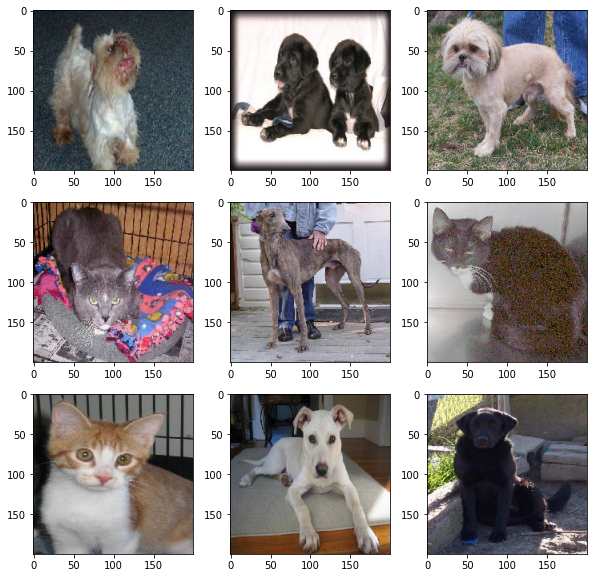

In [134]:
from keras.utils import array_to_img
import random

f, axarr = plt.subplots(3,3, figsize=(10,10))
randomlist = random.sample(range(10, 30), 9)
axarr[0,0].imshow(array_to_img(X[randomlist[1]]))
axarr[0,1].imshow(array_to_img(X[randomlist[2]]))
axarr[0,2].imshow(array_to_img(X[randomlist[3]]))
axarr[1,0].imshow(array_to_img(X[randomlist[4]]))
axarr[1,1].imshow(array_to_img(X[randomlist[5]]))
axarr[1,2].imshow(array_to_img(X[randomlist[6]]))
axarr[2,0].imshow(array_to_img(X[randomlist[7]]))
axarr[2,1].imshow(array_to_img(X[randomlist[8]]))
axarr[2,2].imshow(array_to_img(X[randomlist[0]]))

print(y[randomlist[1]])
print(y[randomlist[2]])
print(y[randomlist[3]])
print(y[randomlist[4]])
print(y[randomlist[5]])
print(y[randomlist[6]])
print(y[randomlist[7]])
print(y[randomlist[8]])
print(y[randomlist[0]])

plt.show()

# Data Frames
Create data frames from files.  Labels are extracted from the file names. Test and train are split up and 20% of train is allocated to verification. 

In [135]:
exts = ['.jpg']
filepaths = [p for p in Path(mainpath).iterdir() if p.suffix in exts]
labels = list(map(lambda x: x.name[0:3], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [136]:
image_df

,Filepath,Label
0,/content/kaggle/processed/cat.3902.jpg,cat
1,/content/kaggle/processed/dog.374.jpg,dog
2,/content/kaggle/processed/cat.3885.jpg,cat
3,/content/kaggle/processed/dog.28.jpg,dog
4,/content/kaggle/processed/cat.3754.jpg,cat
...,...,...
1095,/content/kaggle/processed/cat.3715.jpg,cat
1096,/content/kaggle/processed/cat.3606.jpg,cat
1097,/content/kaggle/processed/dog.351.jpg,dog
1098,/content/kaggle/processed/cat.3567.jpg,cat


In [137]:
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

# Load Image Data

In [138]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [139]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(200, 200),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(200, 200),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(200, 200),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 616 validated image filenames belonging to 2 classes.
Found 154 validated image filenames belonging to 2 classes.
Found 330 validated image filenames belonging to 2 classes.


# Training

I had quite a bit of difficulty getting the CNN to recognize dogs and cats.  I was very prone to underfitting even when I increased the number of layers.  The kernel sizes was the most important parameter for improving the model.  11x11 seems to be the best kernal size with larger and smaller kernel sizes performing poorly.  More or less layers also performed poorly. 

In [140]:
inputs = tf.keras.Input(shape=(200, 200, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Dropout(rate = 0.25)(x)

#x = tf.keras.layers.Conv2D(filters=32, kernel_size=(11,11), activation='relu')(x)
#x = tf.keras.layers.BatchNormalization()(x)
#x = tf.keras.layers.MaxPool2D()(x)
#x = tf.keras.layers.Dropout(rate = 0.25) (x)

# x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.BatchNormalization()(x)
# x = tf.keras.layers.Dropout(0.25)(x)
#x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            patience=3
        )
    ]
)

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_44 (Conv2D)          (None, 198, 198, 16)      448       
                                                                 
 batch_normalization_23 (Bat  (None, 198, 198, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 99, 99, 16)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 99, 99, 16)        0         
                                                                 
 flatten_18 (Flatten)        (None, 156816)            0  

# Results
The results are listed below.  Printing the predicted values show that many are clusterd around 0.5 showing that the model has not really found features that differentiate dogs from cats.  This is reflected in the weak accuracy and poor confusion matrix results. 

In [141]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.68580
Test Accuracy: 59.39%


In [142]:
model.predict(test_images)

11/11 [==============================] - 4s 373ms/step


array([[0.67004764],
       [0.56226367],
       [0.6029744 ],
       [0.6215038 ],
       [0.30570707],
       [0.53732497],
       [0.5412735 ],
       [0.6622109 ],
       [0.35876796],
       [0.5367142 ],
       [0.51915234],
       [0.43909407],
       [0.59853995],
       [0.55965245],
       [0.49616966],
       [0.541404  ],
       [0.47388145],
       [0.14204738],
       [0.50699914],
       [0.38152185],
       [0.36374673],
       [0.47484967],
       [0.58726585],
       [0.6104946 ],
       [0.5485187 ],
       [0.18102276],
       [0.24437872],
       [0.36493903],
       [0.35871622],
       [0.34031582],
       [0.149434  ],
       [0.55638695],
       [0.5851028 ],
       [0.35204074],
       [0.59479564],
       [0.5353039 ],
       [0.61213887],
       [0.5714561 ],
       [0.51459616],
       [0.4982112 ],
       [0.62257195],
       [0.45783165],
       [0.48483554],
       [0.62005156],
       [0.29274982],
       [0.44665056],
       [0.3403981 ],
       [0.601

11/11 [==============================] - 4s 375ms/step


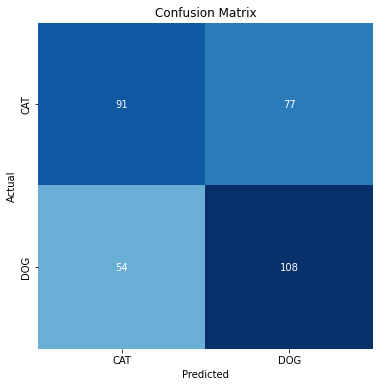

Classification Report:
----------------------
               precision    recall  f1-score   support

         CAT       0.63      0.54      0.58       168
         DOG       0.58      0.67      0.62       162

    accuracy                           0.60       330
   macro avg       0.61      0.60      0.60       330
weighted avg       0.61      0.60      0.60       330



In [143]:
predictions = (model.predict(test_images) >= 0.51).astype(int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["CAT", "DOG"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.yticks(ticks=[0.5, 1.5], labels=["CAT", "DOG"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)